In [1]:
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np 
import pymc3 as pm

%matplotlib inline 

np.random.seed(42)

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### 3.1 Inferring a Rate

/tmp/ipykernel_2253/531616632.py:5: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace=pm.sample(10000, chains=2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 5 seconds.


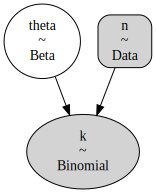

In [2]:

with pm.Model() as model:
    n = pm.Data('n', 10)
    theta = pm.Beta("theta", alpha=1, beta=1)
    pm.Binomial('k', p=theta, n=n, observed=5)
    trace=pm.sample(10000, chains=2)

pm.model_to_graphviz(model)

/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


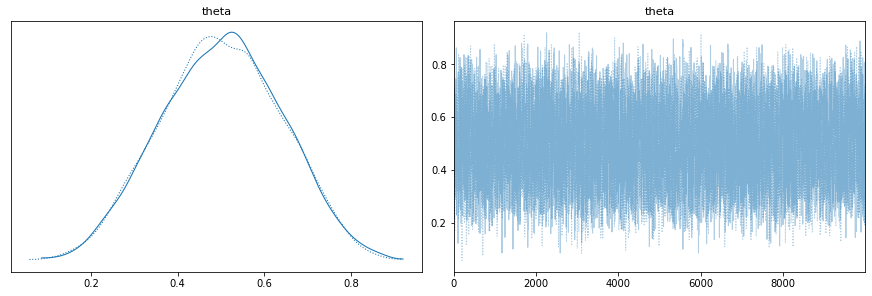

In [3]:
az.plot_trace(trace, figsize=(12,4));

/tmp/ipykernel_2253/1636834097.py:5: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace=pm.sample(10000, chains=2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 5 seconds.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


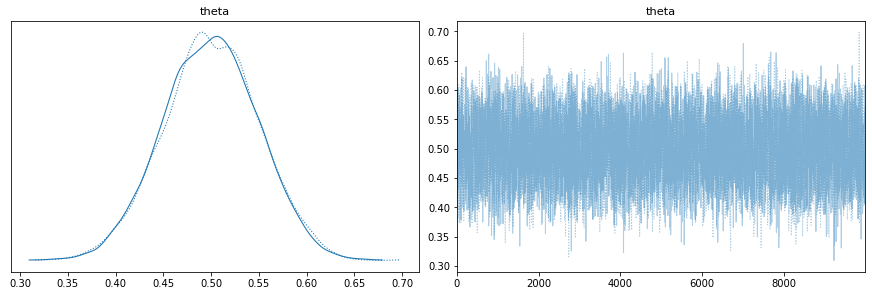

In [4]:
with pm.Model() as model:
    n = pm.Data('n', 100)
    theta = pm.Beta("theta", alpha=1, beta=1)
    y_obs = pm.Binomial('k', p=theta, n=n, observed=50)
    trace=pm.sample(10000, chains=2)

pm.model_to_graphviz(model)

az.plot_trace(trace, figsize=(12,4));

### 3.2 Difference Between Two Rates

/tmp/ipykernel_2253/2603801699.py:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace=pm.sample(10000, chains=2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta2, theta1]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 6 seconds.


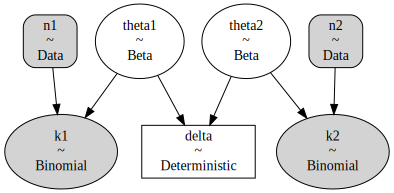

In [5]:
with pm.Model() as model:
    n1 = pm.Data('n1', 10)
    n2 = pm.Data('n2', 10)
    
    theta1 = pm.Beta("theta1", alpha=1, beta=1)
    theta2 = pm.Beta("theta2", alpha=1, beta=1)
    
    y_obs1 = pm.Binomial('k1', p=theta1, n=n1, observed=5)
    y_obs2 = pm.Binomial('k2', p=theta2, n=n2, observed=7)
    delta = pm.Deterministic('delta', theta1 - theta2)
    
    trace=pm.sample(10000, chains=2)
    
pm.model_to_graphviz(model)

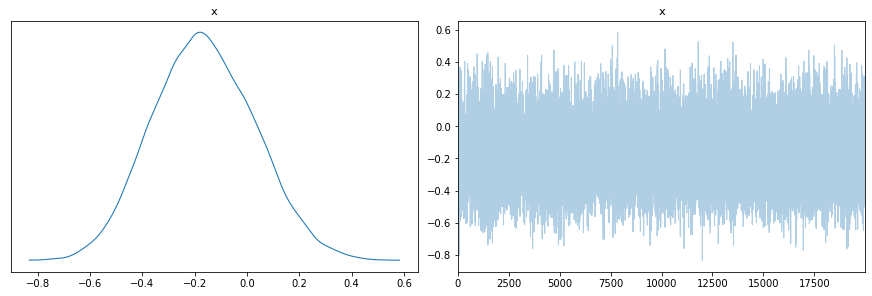

In [6]:
az.plot_trace(trace['delta'], figsize=(12,4));

### 3.3 Inferring a Common Rate

/tmp/ipykernel_2253/2995012760.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace=pm.sample(10000, chains=2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 5 seconds.


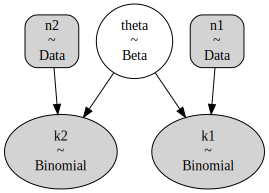

In [7]:
with pm.Model() as model:
    n1 = pm.Data('n1', 10)
    n2 = pm.Data('n2', 10)
    
    theta = pm.Beta("theta", alpha=1, beta=1)
    
    y_obs1 = pm.Binomial('k1', p=theta, n=n1, observed=5)
    y_obs2 = pm.Binomial('k2', p=theta, n=n2, observed=7)
    
    trace=pm.sample(10000, chains=2)
    
pm.model_to_graphviz(model)

/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


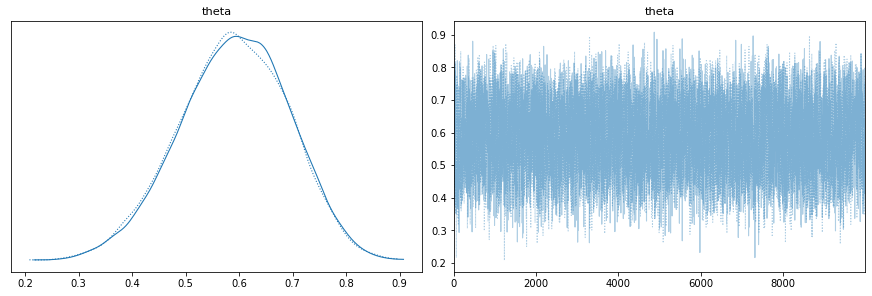

In [8]:
az.plot_trace(trace, figsize=(12,4));

### 3.4 Prior and Posterior Prediction

/tmp/ipykernel_2253/2852012136.py:8: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace=pm.sample(samples, chains=2, tune=1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta, theta_prior]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 3 seconds.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


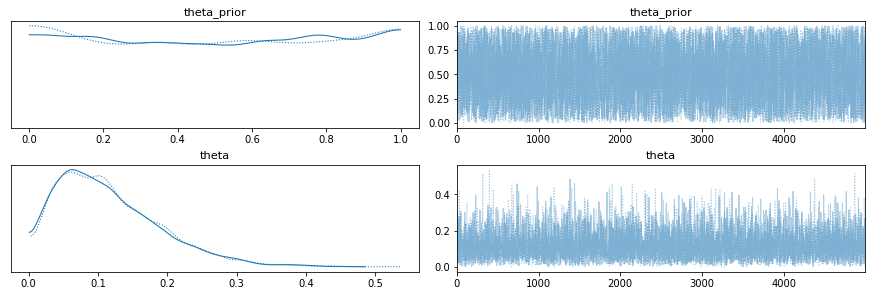

In [9]:
samples = 5000

with pm.Model() as model:
    n = pm.Data('n', 15)
    theta_prior = pm.Beta("theta_prior", alpha=1, beta=1)
    theta = pm.Beta("theta", alpha=1, beta=1)
    pm.Binomial('k', p=theta, n=n, observed=1)
    trace=pm.sample(samples, chains=2, tune=1000)

az.plot_trace(trace, figsize=(12,4));

In [10]:
prior_predk = pm.sample_prior_predictive(samples, model)['k']
post_predk = pm.sample_posterior_predictive(trace, samples, model)['k']

post_predk = np.bincount(post_predk)
post_predk = post_predk/post_predk.sum()

prior_predk = np.bincount(prior_predk)
prior_predk = prior_predk/prior_predk.sum()

/usr/local/lib/python3.8/dist-packages/pymc3/sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


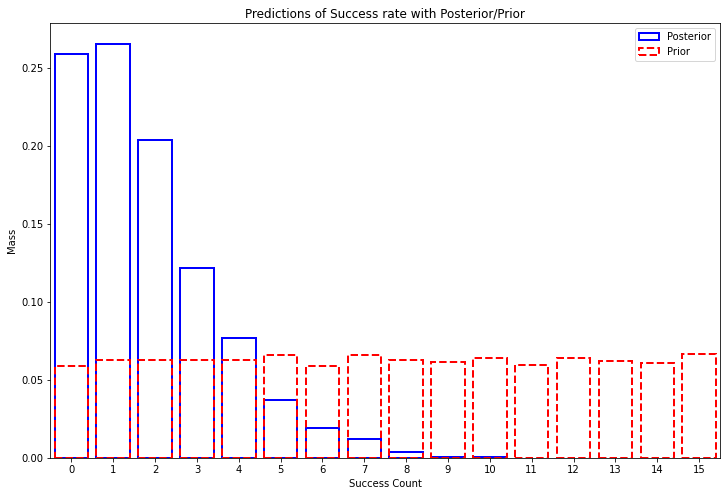

In [11]:
plt.figure(figsize=(12,8))
sns.barplot(
    x=list(range(0, post_predk.shape[0])), 
    y=post_predk, 
    edgecolor='blue', 
    facecolor=(0, 0, 0, 0), 
    linewidth=2, 
    label='Posterior'
);

sns.barplot(
    x=list(range(0, prior_predk.shape[0])),
    y=prior_predk, 
    edgecolor='red', 
    facecolor=(0, 0, 0, 0), 
    linestyle='--', 
    linewidth=2, 
    label='Prior'
).set_title("Predictions of Success rate with Posterior/Prior")

plt.xlabel("Success Count")
plt.ylabel("Mass")
plt.legend();

### 3.5 Posterior Prediction

/tmp/ipykernel_2253/3654934152.py:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace=pm.sample(samples, chains=2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 3 seconds.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


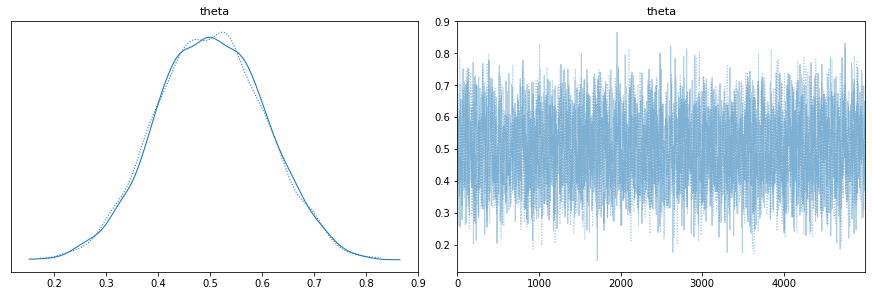

In [12]:
samples = 5000

with pm.Model() as model:
    n1 = pm.Data('n1', 10)
    n2 = pm.Data('n2', 10)
    
    theta = pm.Beta("theta", alpha=1, beta=1)
    
    y_obs1 = pm.Binomial('k1', p=theta, n=n1, observed=0)
    y_obs2 = pm.Binomial('k2', p=theta, n=n2, observed=10)
    
    trace=pm.sample(samples, chains=2)
    
az.plot_trace(trace, figsize=(12,4));

In [13]:
posterior_pred = pm.sample_posterior_predictive(trace, samples, model)

/usr/local/lib/python3.8/dist-packages/pymc3/sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


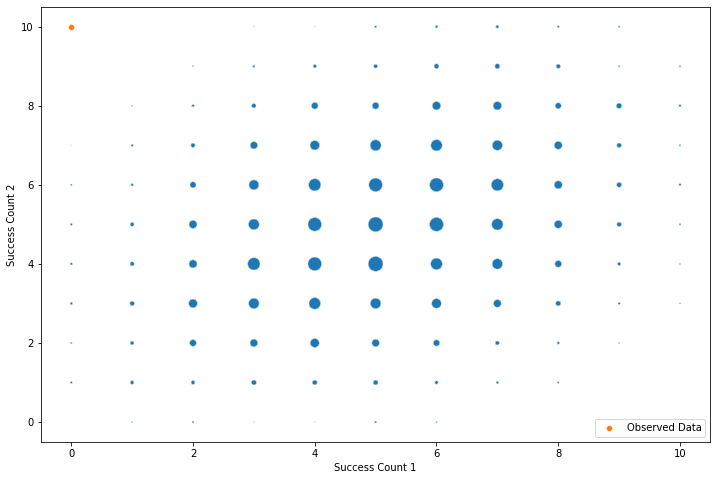

In [14]:
from collections import Counter 

combos = list(zip(posterior_pred['k1'], posterior_pred['k2']))
weight_counter = Counter(combos)
weights = [weight_counter[(posterior_pred['k1'][i], posterior_pred['k2'][i])] for i, _ in enumerate(posterior_pred['k1'])]

plt.figure(figsize=(12,8))
sns.scatterplot(posterior_pred['k1'], posterior_pred['k2'], s=weights);
sns.scatterplot(x=[0], y=[10], label='Observed Data');
plt.xlabel("Success Count 1")
plt.ylabel("Success Count 2")
plt.legend();

### 3.6 Joint Distributions

In [101]:
np.random.seed(42)
samples = 20000
k = np.array([16, 18, 22, 25, 27])
m = k.shape[0]
n_max = 500

with pm.Model() as model:
    
    theta = pm.Beta("theta", alpha=1, beta=1)
    
    probs = np.full(n_max, 1/n_max)
    n = pm.Categorical("n", p = probs)
    
    pm.Binomial("k", n=n, p=theta, observed=k)
        
    trace=pm.sample(samples, start={"n": n_max/2, "theta": 0.5}, chains=2, tune=10000)

/tmp/ipykernel_2253/4014304455.py:16: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace=pm.sample(samples, start={"n": n_max/2, "theta": 0.5}, chains=2, tune=10000)
Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>NUTS: [theta]
>CategoricalGibbsMetropolis: [n]


Sampling 2 chains for 10_000 tune and 20_000 draw iterations (20_000 + 40_000 draws total) took 19 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


#### MLE Estimation

In [132]:
from scipy.special import loggamma

n_sample = trace['n']
theta_sample = trace['theta'] 

thresh = - np.inf
index = 0
 
for i in range(n_sample.shape[0]):
    log_likelihood = 0
    
    for j in range(m):
        log_likelihood+= loggamma(n_sample[i]+1) - loggamma(k[j]+1) - loggamma(n_sample[i]-k[j]+1)
        log_likelihood+= k[j]*np.log(theta_sample[i]) + (n_sample[i] - k[j])*np.log(1-theta_sample[i])
    
    if log_likelihood > thresh:
        index = i
        thresh = log_likelihood
        

/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


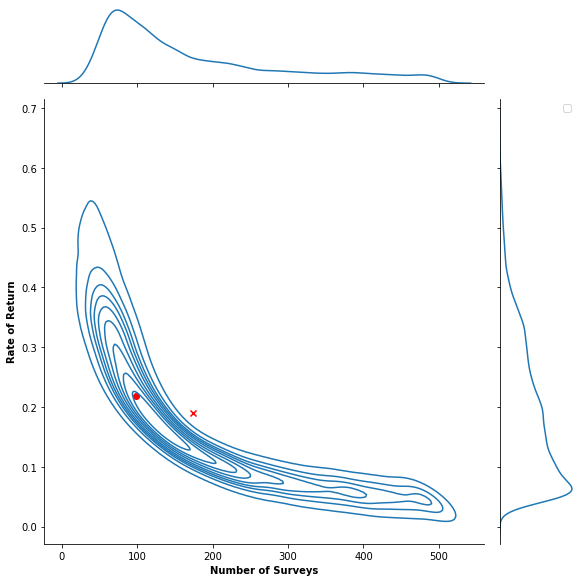

In [133]:
means = az.summary(trace)['mean']

h = sns.jointplot(trace['n'], trace['theta'], height=8, kind='kde')
h.ax_joint.set_xlabel('Number of Surveys', fontweight='bold')
h.ax_joint.set_ylabel('Rate of Return', fontweight='bold')
# mean
h.ax_joint.scatter(x=means['n'], y=means['theta'], c='red', marker='x');
# MLE
h.ax_joint.scatter(x=n_sample[index], y=theta_sample[index], c='red', marker='o');
plt.legend();